**Author name(s):** <span style="color:red">.Maria Cobo and Alba Mas</span>

# Systems & Network Biology - PRACTICAL 8

# Dynamics of feed-forward loops

---
To submit your report, answer the questions below and save the *notebook* clicking on `File > Download as > iPython Notebook` in the menu at the top of the page. **Rename the notebook file** to ''`practicalN_name1_name2.ipynb`'', where `N` is the number of the practical, and `name1` and `name2` are the first surnames of the two team members (only one name if the report is sent individually). Finally, **submit the resulting file through the *Aula Global***.

*IMPORTANT REMINDER: Before the final submission, remember to **reset the kernel** and re-run the whole notebook again to check that it works.*

---

In this practical session we will integrate the equations of a coherent feed-forward loop (FFL) with AND logic at the last step:

$$
\frac{dy}{dt}=\beta_y\frac{x^n}{K_{xy}^n+x^n}-\delta_y y
$$
$$
\frac{dz}{dt}=\beta_z\frac{x^m}{K_{xz}^m+x^m}\frac{y^p}{K_{yz}^p+y^p}-\delta_z z
$$

We will consider the following parameters: $\beta_y=10$, $\beta_z=50$, $\delta_y=\delta_z=0.1$, $K_{xy}=10$, $K_{xz}=20$, $K_{yz}=40$, and $n=m=p=4$.

First, define a function of time that represents a square pulse with $x=0$ if $t<T_{on}$ and $t>T_{off}$, and $x=X_{on}$ otherwise. Plot this function for $T_{on}=10$, $T_{off}=20$, and $X_{on}=50$ (let time run from 0 to 50, for instance).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def xpulse(t):
    if t<=T_on or t>=T_off:
        return 0
    else:
        return X_on

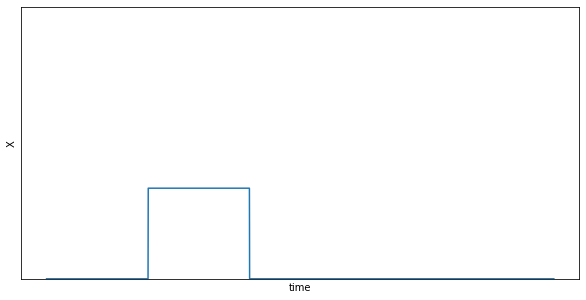

In [3]:
T_on = 10
T_off= 20
X_on = 50

# Generate the time vector and apply the pulse function
tvec = np.arange(0, 50, 0.01)
xvec = np.array([xpulse(t) for t in tvec])  # Apply xpulse for each time point

# Plot the function
plt.figure(figsize=(10, 5))
plt.plot(tvec, xvec, label="X(t)")
plt.xlabel("time")
plt.ylabel("X")
plt.ylim(0, 150)

# Remove axis values
plt.xticks([])  # Remove x-axis values
plt.yticks([])  # Remove y-axis values
plt.show()

Next, simulate the response of the FFL (in terms of both $y$ and $z$) to the square pulse in $x$ calculated above.

In [4]:
# coherent feedforward loop
def cffl(YZ, t):
    y, z = YZ
    x = xpulse(t)
    dy = betay*x**n/(Kxy**n + x**n) - deltay*y
    dz = (betaz*x**m/(Kxz**m + x**m))*(y**p/(Kyz**p + y**p)) - deltaz*z
    return [dy, dz]

In [5]:
betay = 10
betaz = 50
deltay = 0.1
deltaz = 0.1
Kxy = 10
Kxz = 20 
Kyz = 40
n= 4
m=4
p=4

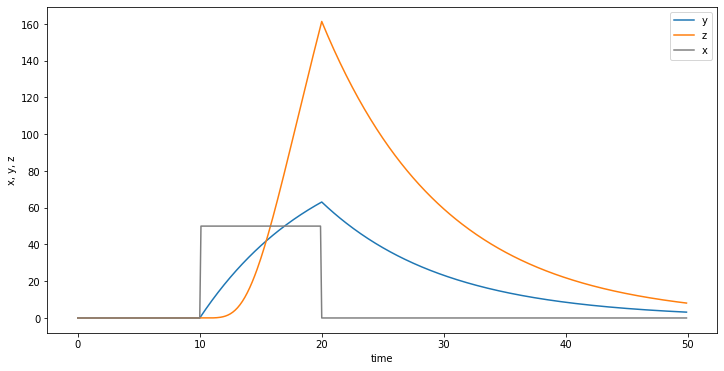

In [6]:
# Simulation parameters
tvec = np.arange(0, 50, 0.1)  # Time from 0 to 50
YZ0 = [0, 0]  # Initial values for y and z

# Solve the differential equations
YZ = odeint(cffl, YZ0, tvec)
y_values, z_values = YZ[:, 0], YZ[:, 1]

# Calculate x(t) over the same time vector
x_values = np.array([xpulse(t) for t in tvec])

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(tvec, y_values, label="y")
plt.plot(tvec, z_values, label="z")
plt.plot(tvec, x_values, label="x", color="gray")
plt.xlabel("time")
plt.ylabel("x, y, z")
plt.legend()
plt.show()

Interpret the results in terms of the different delays:

**Describe and comment clearly your result, in your own words: 
<span style="color:red">In both plots we can observe the dynamics of the system with variables x(t), y(t), and z(t) over time but each one of them focuses on different aspects. The system involves a feed-forward loop with an AND logic.  The first plot shows us the input signal of x(t) over time. we can clearly see how the pulse is active between t= 10 and t=20. The second plot shows us how y(t) and z(t) respond to this input, we observe a delay in z(t) and a more pronounced peak due to the feed-forward loop with AND logic.</span>**

**<span style="color:red">As x(t) activates at t=10, y(t) responds and starts increasing showing a peak at t=20 and then starts decreasing progressively  after x(t) turns off. </span>**

**<span style="color:red">Since z(t) depends on both x(t) and y(t), we observe a delayed responde because it will only start increasing when we reach a sufficient value of y(t). </span>**

**<span style="color:red">Once z(t) reaches its peak (higher than y(t)), it decays more slowly because it is influenced by both the earlier accumulated y(t) and the effect of x(t).</span>**



To compare the behavior shown above with the case of a simple cascade, repeat the simulation removing the feedforward connection from X to Z.

In [7]:
def cascade(YZ, t):
    y, z = YZ
    x = xpulse(t)
    dy = betay*x**n/(Kxy**n + x**n) - deltay*y
    dz = betaz*y**p/(Kyz**p + y**p) - deltaz*z
    return [dy, dz]

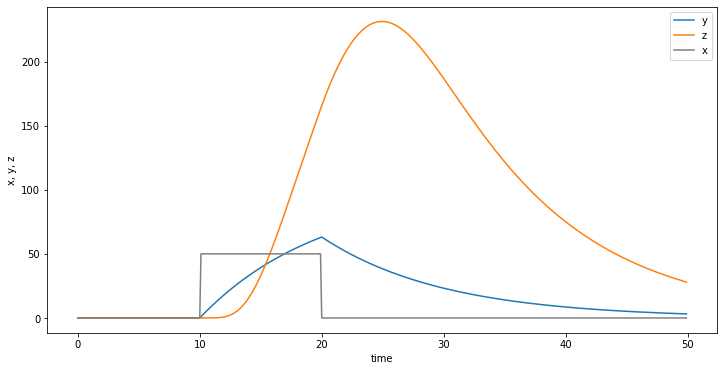

In [8]:
tvec = np.arange(0, 50, 0.1)  # Time from 0 to 50
YZ0 = [0, 0]  # Initial values for y and z

# Solve the differential equations
YZ = odeint(cascade, YZ0, tvec)
y_values, z_values = YZ[:, 0], YZ[:, 1]

# Calculate x(t) over the same time vector
x_values = np.array([xpulse(t) for t in tvec])

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(tvec, y_values, label="y")
plt.plot(tvec, z_values, label="z")
plt.plot(tvec, x_values, label="x", color="gray")
plt.xlabel("time")
plt.ylabel("x, y, z")
plt.legend()
plt.show()

**Describe and comment clearly your result, in your own words: <span style="color:red">The cascade system has a more linear, delayed, and less sharp response in z(t), letting us observe how  removing the feedforward link impacts the system's dynamics.</span>**

**<span style="color:red"> Similar to the FFL plot, y(t) increases during the pulse and decreases right after.</span>**

**<span style="color:red"> Compared to the FFL, z(t) in the cascade system shows a slower increase and a lower peak. Since z(t) only depends on y(t) now, it responds more gradually and less steeply than in the FFL case where both x(t) and y(t) have an influence on it.</span>**

Next, consider again the full feedforward loop. Apply an input X pulse of various durations and study the response of $z$.

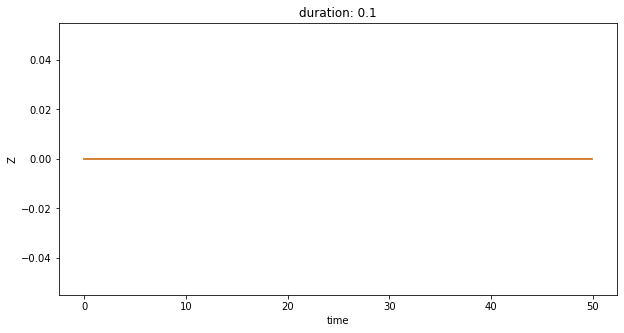

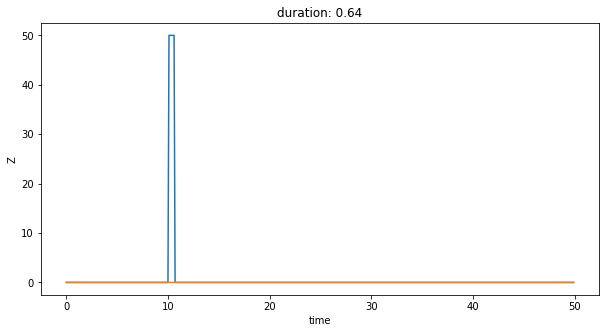

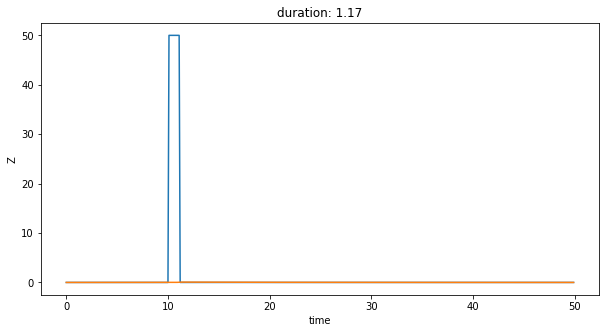

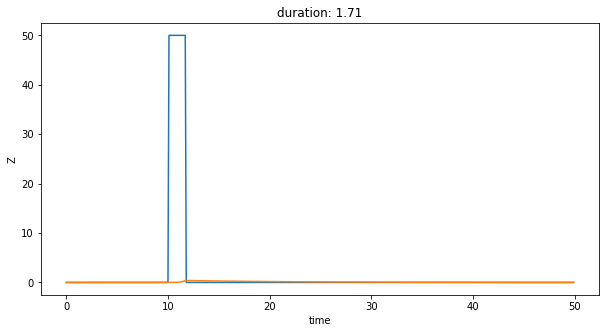

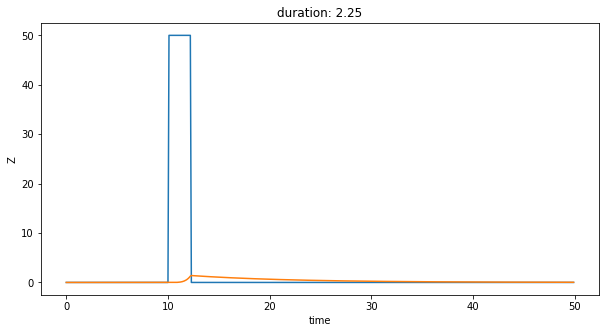

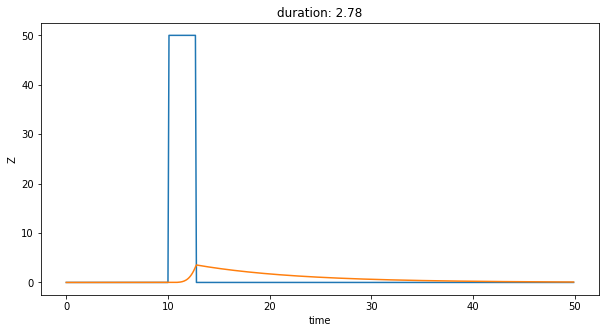

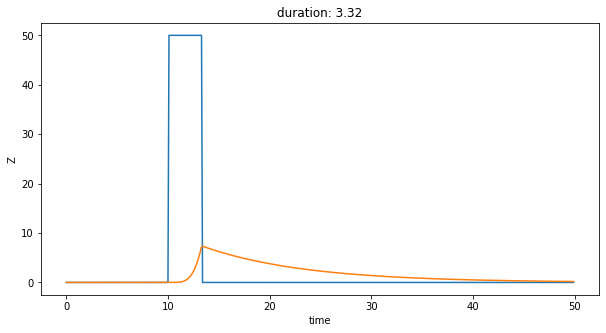

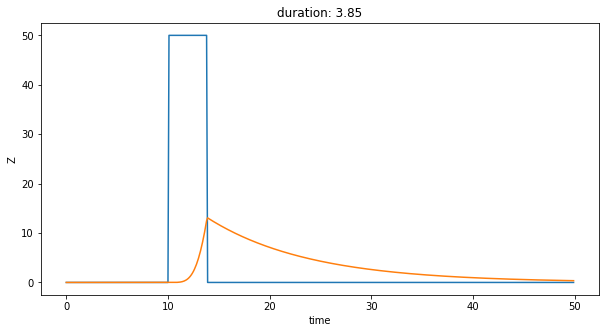

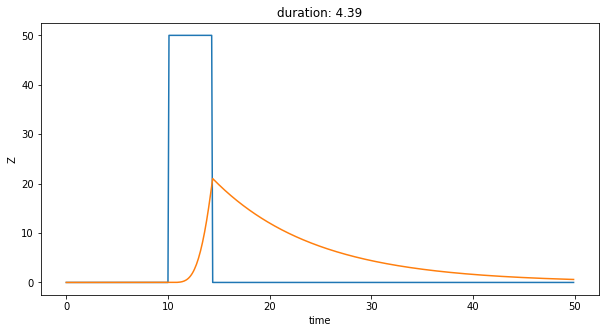

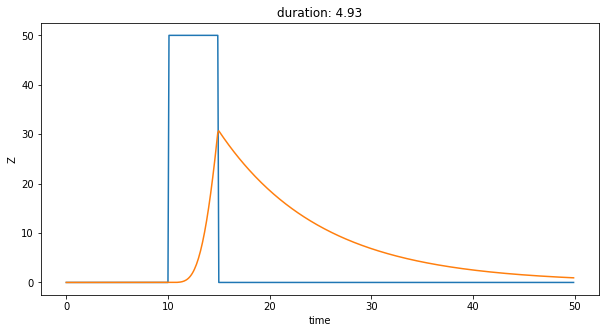

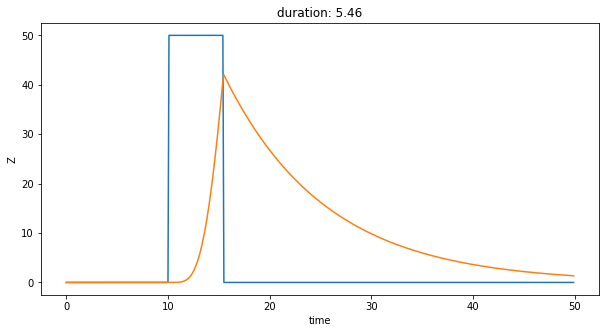

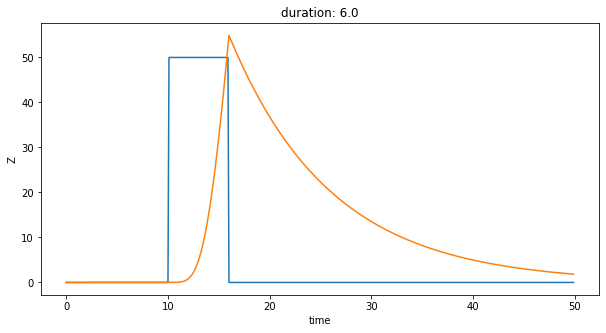

In [12]:
# Define the xpulse function
def xpulse(t, T_off):
    if t <= T_on or t >= T_off:
        return 0
    else:
        return X_on

# Constants and simulation parameters
T_on = 10
X_on = 50
betay = 10
betaz = 50
deltay = 0.1
deltaz = 0.1
Kxy = 10
Kxz = 20 
Kyz = 40
n = 4
m = 4
p = 4
tvec = np.arange(0, 50, 0.1)  # Time vector
YZ0 = [0, 0]  # Initial values for y and z

# Function defining the differential equations
def cffl(YZ, t):
    y, z = YZ
    x = xpulse(t, T_off)
    dy = betay * x**n / (Kxy**n + x**n) - deltay * y
    dz = (betaz * x**m / (Kxz**m + x**m)) * (y**p / (Kyz**p + y**p)) - deltaz * z
    return [dy, dz]

# Define a range of pulse durations
pulse_durations = [0.10, 0.64, 1.17, 1.71, 2.25, 2.78, 3.32, 3.85, 4.39, 4.93, 5.46, 6.00]

# Iterate over each pulse duration
for duration in pulse_durations:
    T_off = T_on + duration  # Calculate the end time of the pulse
    
    # If the pulse duration is too short, we manually set Z to zero.
    if duration <= 0.1:
        Z_values = np.zeros_like(tvec)
        X_values = np.array([xpulse(t, T_off) for t in tvec])
    else:
        # Solve the differential equations for the given pulse duration
        YZ = odeint(cffl, YZ0, tvec, hmax=0.1)
        Z_values = YZ[:, 1]  # Extract z values
        X_values = np.array([xpulse(t, T_off) for t in tvec])  # Calculate x(t) for each time point

    # Plot the results for the current pulse duration
    plt.figure(figsize=(10, 5))
    plt.plot(tvec, X_values)
    plt.plot(tvec, Z_values)
    plt.xlabel("time")
    plt.ylabel("Z")
    plt.title(f"duration: {duration}")
    plt.show()

**Describe and comment clearly your result, in your own words, <span style="color:red">Our resulting plots show the dynamics of Z (output) in response to an X (input) pulse of varying durations. Each subplot corresponds to a different input pulse duration, ranging from very short to longer (0.1 - 6) For very short durations, Z is barely activated, as the input does not last long enough to bring out a significant response. As the duration of X increases, the response in Z grows more pronounced, with a sharp activation followed by a decay. This indicates that the feedforward loop integrates the input over time, with the response of Z reflecting the temporal characteristics of the X pulse. For longer pulses, the Z response becomes both more constant and steep. These results highlight the sensitivity of Z to the temporal properties of the input X.</span>**

Finally, we'll study the response of an incoherent feedforward loop to a step pulse of X, such that $x=0$ if $t<T_{on}$  and $x=X_{on}$ otherwise. We'll use as before $T_{on}=10$ and $X_{on}=50$. Rewrite the differential equation model describe above for a situation in which X activates both Y and Z, and Y represses Z, and assume that Z integrates its inputs via an AND gate, as before:

$$
\frac{dz}{dt}=\beta_z\frac{x^m}{K_{xz}^m+x^m}\frac{1}{1+(y/K_{yz})^p}-\delta_z z
$$

Integrate the system for the step pulse described above, and plot the resulting response of Z.

In [10]:
# incoherent feedforward loop
def iffl(YZ, t):
    y, z = YZ
    x = step(t)
    dy = betay*x**n/(Kxy**n + x**n) - deltay*y
    dz = betaz*x**m/(Kxz**m + x**m)/(1 + (y/Kyz)**p) - deltaz*z
    return [dy, dz]

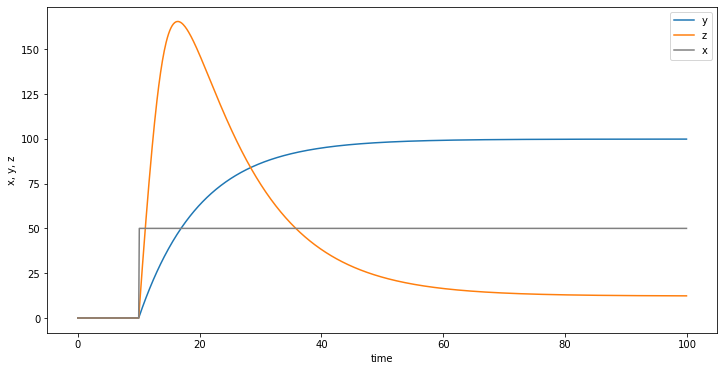

In [11]:
def step(t):
    if t<=T_on:
        return 0
    else:
        return X_on

# incoherent feedforward loop
def iffl(YZ, t):
    y, z = YZ
    x = step(t)
    dy = betay*x**n/(Kxy**n + x**n) - deltay*y
    dz = betaz*x**m/(Kxz**m + x**m)/(1 + (y/Kyz)**p) - deltaz*z
    return [dy, dz]

# Simulation parameters
tvec = np.arange(0, 100, 0.1)  # Time from 0 to 100
YZ0 = [0, 0]  # Initial values for y and z

# Solve the differential equations
YZ = odeint(iffl, YZ0, tvec)
y_values, z_values = YZ[:, 0], YZ[:, 1]

# Calculate x(t) over the same time vector
x_values = np.array([step(t) for t in tvec])

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(tvec, y_values, label="y")
plt.plot(tvec, z_values, label="z")
plt.plot(tvec, x_values, label="x", color="gray")
plt.xlabel("time")
plt.ylabel("x, y, z")
plt.legend()
plt.show()

**Describe and comment clearly your result, in your own words, <span style="color:red"> In this incoherent feedforward loop x(t) remains zero until itactivates at t=10 and then i gets constant with the value X_on = 50.</span>**

**<span style="color:red">When looking at y(t) we see how it increases after x(t) is activated and it stabilizes to a steady state.</span>**

**<span style="color:red">If we observe z(t), it increases after x(t) is activated but it reached a point where it gets supressed by the increasing levels of y(t).</span>**